In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import math

In [3]:
import torch.nn as nn
import torch

In [4]:
from utils import MnistData
from models import ModelManager, ModelType

In [5]:
model_loaded = ModelManager.get_trained(ModelType.MnistCnnPatt)
data = MnistData(True)

In [6]:
max_norm = 50 / 255  # kappa - the radius of L_\infinity ball around benign example
step_size = 1e-2  # alpha - the size of the step

In [8]:
benign_images, labels = data.get_training_batch(1000)
images = benign_images + 2 * max_norm * (torch.rand((len(labels), 1, 28, 28)) - 0.5)

for step in range(math.floor(min(max_norm * 4 * 255, max_norm * 255 * 1.25))):
    images.requires_grad = True
    if step % 10 == 0:
        print(f'--- {step} ---')
    if images.grad is not None:
        images.grad.zero_()
    loss = nn.CrossEntropyLoss()(model_loaded(images), labels)
    loss.backward()
    images = MnistData.clip(benign_images, images + step_size * images.grad.apply_(lambda x: 1 if x >= 0 else -1), max_norm)
altered_training_images = images

--- 0 ---
--- 10 ---
--- 20 ---
--- 30 ---
--- 40 ---
--- 50 ---
--- 60 ---


In [9]:
possible_adversarials = MnistData.get_adversarials(model_loaded, benign_images, labels, altered_training_images)
len(possible_adversarials)

565

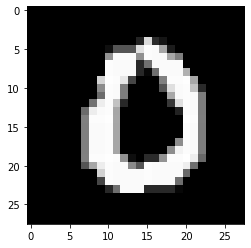

+++++


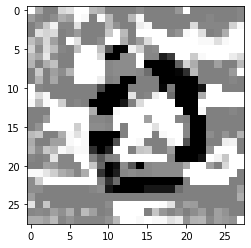

=====


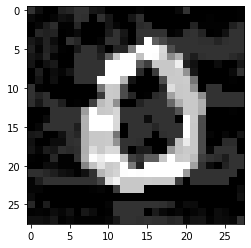

Label: 0, Prediction: 2, Confidence: 1.0
Original prediction: 0, Original confidence: 1.0


In [10]:
MnistData.show_adversarial(possible_adversarials, benign_images, altered_training_images, 0)